In [1]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("inter_choco_rating.csv")
df.head()

,rating,CQ,sweetness,acidity,bitterness,roast,intensity,complexity,structure,length,appearance,flavor,quality,aroma_struct,aroma_mouthfeel,flavor_length,flavor_compl,log_cocoa_perc,log_aroma,log_mouthfeel
0,2.5,57.0,55.0,48.0,37.0,62.0,51.0,43.0,41.0,29.0,74.0,81.4,83.0,2952.0,5184.0,2360.6,3500.2,4.174387,4.276666,4.276666
1,4.0,53.0,42.0,40.0,49.0,71.0,37.0,36.0,80.0,82.0,92.0,88.4,86.5,6560.0,6994.6,7248.8,3182.4,4.317488,4.406719,4.446174
2,3.5,44.0,48.0,76.0,50.0,63.0,45.0,52.0,39.0,81.0,100.0,86.4,87.0,3120.0,6560.0,6998.4,4492.8,4.317488,4.382027,4.406719
3,4.0,60.0,56.0,76.0,20.0,68.0,64.0,62.0,83.0,51.0,100.0,89.0,90.0,6059.0,6621.1,4539.0,5518.0,4.174387,4.290459,4.507557
4,3.5,23.0,21.0,8.0,70.0,76.0,52.0,10.0,78.0,69.0,92.0,84.2,82.5,6552.0,6997.2,5809.8,842.0,4.442651,4.430817,4.422449


In [3]:
#create a training sample of 80% of our data
df_train = df.sample(frac=0.8, random_state=5)
#test sample of 20% of our data
df_test = df.drop(df_train.index, axis=0)

In [4]:
#seperate training
y_train = df_train['rating']
x_train = df_train.iloc[:,1:]
#seperate testing
y_test = df_train['rating']
x_test = df_train.iloc[:,1:]

In [5]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, x_train, y_train, scoring='r2', cv=crossvalidation))
print('baseline: ', baseline)

baseline:  0.8674822925791771


In [6]:
#model
df_sm = sm.add_constant(x_train)
results = sm.OLS(y_train, df_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     419.4
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:15:39   Log-Likelihood:                -539.63
No. Observations:                1094   AIC:                             1119.
Df Residuals:                    1074   BIC:                             1219.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.9958      1.316      3.037      0.002       1.415       6.577
CQ                  0.0029      0.001      4.247      0.000       0.002       0.004
sweetness           0.0012      0.001      1.390      0.165      -0.001       0.003
acidity             0.0017      0.001      2.492      0.013       0.000       0.003
bitterness          0.0008      0.001      0.917      0.360      -0.001       0.002
roast             3.76e-05      0.001      0.048      0.961      -0.001       0.002
intensity          -0.0007      0.001     -0.776      0.438      -0.002       0.001
complexity         -0.0375      0.005     -7.206      0.000      -0.048      -0.027
structure          -0.0118      0.004     -2.650      0.008      -0.021      -0.003
length             -0.0296      0.005     -6.096      0.000      -0.039      -0.020
appearance          0.0061      0.001      6.241      0.000       0.004       0.008
flavor              0.0035      0.003      1.039      0.299      -0.003       0.010
quality             0.0190      0.001     12.667      0.000       0.016       0.022
aroma_struct        0.0002    5.6e-05      3.555      0.000    8.92e-05       0.000
aroma_mouthfeel     0.0003    4.5e-05      6.046      0.000       0.000       0.000
flavor_length       0.0004   5.97e-05      6.006      0.000       0.000       0.000
flavor_compl        0.0005   5.98e-05      7.931      0.000       0.000       0.001
log_cocoa_perc     -0.0172      0.029     -0.587      0.558      -0.075       0.040
log_aroma          -1.0990      0.171     -6.427      0.000      -1.435      -0.763
log_mouthfeel      -0.1704      0.243     -0.702      0.483      -0.647       0.306
==============================================================================
Omnibus:                     1080.147   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           160913.948
Skew:                          -4.154   Prob(JB):                         0.00
Kurtosis:                      61.831   Cond. No.                     1.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We drop the following variables because they are not significant as a predictor based on the p-value:
- sweetness 
- bitterness 
- roast
- intensity
- flavor
- log_cocoa_perc
- log_mouthfeel


In [8]:
not_sig_cols = ['sweetness', 'bitterness', 'roast', 'intensity', 'log_mouthfeel', 'flavor', 'log_cocoa_perc']
#drop the columns for our train data
x_train = x_train.drop(not_sig_cols, axis=1)
#drop the columns for our test data
x_test = x_test.drop(not_sig_cols, axis=1)

In [9]:
x_train.head()

,CQ,acidity,complexity,structure,length,appearance,quality,aroma_struct,aroma_mouthfeel,flavor_length,flavor_compl,log_aroma
748,28.0,21.0,14.0,27.0,46.0,78.0,79.5,2187.0,6642.0,3974.4,1209.6,4.394449
754,64.0,13.0,22.0,44.0,63.0,74.0,78.5,3124.0,6106.0,5418.0,1892.0,4.262680
1076,53.0,69.0,31.0,52.0,34.0,96.0,69.5,3328.0,4224.0,2448.0,2232.0,4.158883
1351,43.0,24.0,41.0,90.0,78.0,88.0,93.5,8010.0,8366.0,7144.8,3755.6,4.488636
912,32.0,34.0,31.0,64.0,76.0,86.0,77.5,5184.0,7290.0,6292.8,2566.8,4.394449


In [10]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, x_train, y_train, scoring='r2', cv=crossvalidation))
print('baseline: ', baseline)

baseline:  0.872816133261949


In [11]:
#create model
df_sm = sm.add_constant(x_train)
results = sm.OLS(y_train, df_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     664.6
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:16:50   Log-Likelihood:                -542.30
No. Observations:                1094   AIC:                             1111.
Df Residuals:                    1081   BIC:                             1176.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.3612      0.621      5.409      0.000       2.142       4.580
CQ                  0.0029      0.001      4.351      0.000       0.002       0.004
acidity             0.0016      0.001      2.414      0.016       0.000       0.003
complexity         -0.0395      0.005     -7.867      0.000      -0.049      -0.030
structure          -0.0128      0.004     -3.447      0.001      -0.020      -0.006
length             -0.0330      0.003     -9.715      0.000      -0.040      -0.026
appearance          0.0060      0.001      6.109      0.000       0.004       0.008
quality             0.0193      0.001     13.229      0.000       0.016       0.022
aroma_struct        0.0002   4.57e-05      4.628      0.000       0.000       0.000
aroma_mouthfeel     0.0002   1.82e-05     13.280      0.000       0.000       0.000
flavor_length       0.0004   4.08e-05      9.769      0.000       0.000       0.000
flavor_compl        0.0005   5.76e-05      8.643      0.000       0.000       0.001
log_aroma          -1.0175      0.150     -6.800      0.000      -1.311      -0.724
==============================================================================
Omnibus:                     1095.712   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165296.392
Skew:                          -4.257   Prob(JB):                         0.00
Kurtosis:                      62.613   Cond. No.                     5.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We removed some indignificant variables as predictors towards our target variable, rating, and it has not done anything to move the R^2 value.

## model our prediction

In [12]:
conn = "+".join(list(x_train.columns))
f = 'rating~' + conn
model = ols(formula=f, data=df_train).fit()

### see how well our model does

In [13]:
#predict using information we know
y_pred = model.predict(x_train)

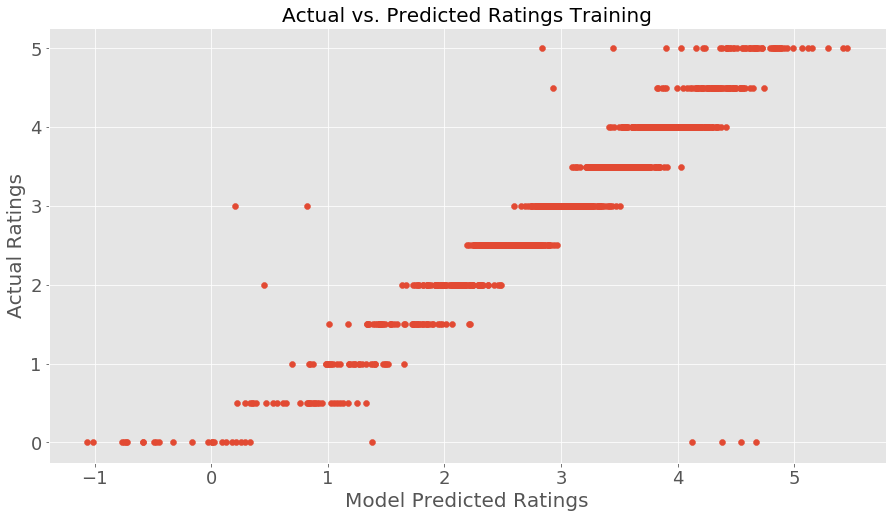

In [14]:
#compare with the actual values
plt.figure(figsize=(15,8))
plt.style.use('ggplot')

plt.scatter(y_pred, y_train)
plt.xlabel('Model Predicted Ratings', size=20)
plt.xticks(size=18)
plt.ylabel('Actual Ratings', size=20)
plt.yticks(size=18)
plt.title('Actual vs. Predicted Ratings Training', size=20)
plt.show()

There are negative rating prediction values which is clearly wrong. 

In [15]:
#get the variance of the two
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_train)
mse 

0.1577926073571463

In [16]:
#Root Mean Squared Error
rmse = np.sqrt(mse)
rmse 

0.3972311762149923

test out the testing data

In [17]:
y_pred_test = model.predict(x_test)

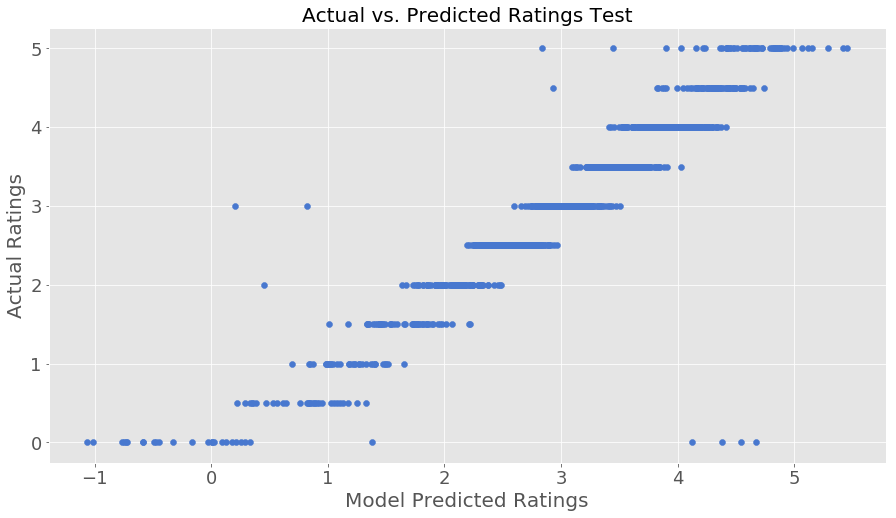

In [18]:
#compare with the actual values
plt.figure(figsize=(15,8))
plt.style.use('seaborn-muted')

plt.scatter(y_pred_test, y_test)
plt.xlabel('Model Predicted Ratings', size=20)
plt.xticks(size=18)
plt.ylabel('Actual Ratings', size=20)
plt.yticks(size=18)
plt.title('Actual vs. Predicted Ratings Test', size=20)
plt.show()

In [19]:
#get the variance of the two
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_test, y_test)
mse 

0.1577926073571463

In [20]:
#Root Mean Squared Error
rmse = np.sqrt(mse)
rmse 

0.3972311762149923